In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [185]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [186]:
# STEPS:
# x y split 
# train test split
# concat x and y train
# imbalance
# separating x train and y train again

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical) 

In [188]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2
kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
selected = pd.DataFrame(kbest)
# selected.head()

In [141]:
# To check the scores
model = SelectKBest(chi2, k=20).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
# df.sort_values(by = ['score'], ascending = False).head(40)

In [ ]:
#i'm staying with :
#RFA_2F,CARDGIFT,HVP1,ETH2,RP1,NGIFTALL,HV1,ETHC5,CARDPROM,NUMPROM,RP3,CLUSTER2,INCOME,IC15,MSA,CONTROLN,
#  HHAS4,HC6,POBC2,MHUC1

In [142]:
nw_df =numerical[['RFA_2F','CARDGIFT','HVP1','ETH2','RP1','NGIFTALL','HV1','ETHC5','CARDPROM','NUMPROM','RP3','CLUSTER2','INCOME','IC15','MSA','CONTROLN','HHAS4','HC6','POBC2','MHUC1']]

In [143]:
new_df = pd.DataFrame(nw_df)

In [144]:
# new_df.head()

In [145]:
all_data = pd.concat((new_df,targets),axis=1)
data_B = all_data.drop(['TARGET_D'], axis=1)
# data_B.head()

In [146]:
# X/y split
X = data_B.drop('TARGET_B',axis = 1)
y = data_B['TARGET_B']

In [147]:
data_B['TARGET_B'].value_counts(dropna=False)

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [149]:
train=pd.concat((X_train,y_train),axis=1)

In [150]:
train = pd.DataFrame(train)

In [151]:
train['TARGET_B'].value_counts()

0    67962
1     3597
Name: TARGET_B, dtype: int64

In [152]:
from sklearn.utils import resample

category_0 = train[data_B['TARGET_B'] == 0]
category_1 = train[data_B['TARGET_B'] == 1]

C:\Users\moshi\AppData\Local\Temp/ipykernel_15892/2834848187.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_0 = train[data_B['TARGET_B'] == 0]
C:\Users\moshi\AppData\Local\Temp/ipykernel_15892/2834848187.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_1 = train[data_B['TARGET_B'] == 1]


In [153]:
#downsampling
# new dataframe by resampling category 0 by using the length of category 1

category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [154]:
# now they have the same shape
print(category_0_undersampled.shape)
print(category_1.shape)

(3597, 21)
(3597, 21)


In [155]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [156]:
data_downsampled['TARGET_B'].value_counts()

0    3597
1    3597
Name: TARGET_B, dtype: int64

In [157]:
# data_downsampled.head()

In [158]:
X_train = data_downsampled.drop('TARGET_B',axis = 1)
y_train = data_downsampled['TARGET_B']

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
model = DecisionTreeClassifier(max_depth=25)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [169]:
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.5202280635559469
train data accuracy was  0.9905476786210731


In [170]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

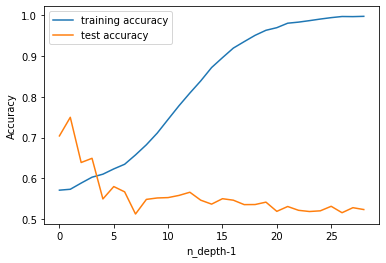

In [171]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()
# as much as the train accuracy go higher, the test go lower

In [172]:
model = DecisionTreeClassifier(max_depth = 25)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [173]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [174]:
y_test

28301    0
22408    0
3104     0
15877    0
20445    0
        ..
73642    0
21565    0
16465    0
42123    0
67705    0
Name: TARGET_B, Length: 23853, dtype: int64

In [175]:
# how important are the different features to our target
model.feature_importances_

array([0.03367021, 0.03656191, 0.03564909, 0.03643036, 0.05520237,
       0.04284834, 0.06675907, 0.0244274 , 0.04189419, 0.05928688,
       0.04973215, 0.0614725 , 0.02945234, 0.05785819, 0.05154591,
       0.09274827, 0.04448521, 0.07120283, 0.08004543, 0.02872733])

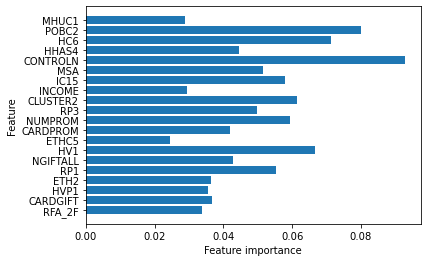

In [176]:
# this code helps you plot the feature importance!

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(model)

In [ ]:
# I am not getting good test reasults, I tried also choosing small max depth (2) and the results were even worse
#  so I'm trying the same but with oversampling in a different notebook